In [287]:
import pandas as pd
import numpy as np
import re

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [288]:
# Opening the CSV for a scan of the first data set.

df_flights = pd.read_csv('../Data/Customer Flight Activity.csv')
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [289]:
# Checking how many rows and columns in the dataset.

df_flights.shape

(405624, 10)

In [290]:
# Checking for duplicated rows in the dataset.

df_flights.duplicated().sum()

np.int64(1864)

In [291]:
# Doing a more detailed check.

duplicated_flights = df_flights[df_flights.duplicated(keep=False)]

duplicated_flights

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [292]:
# Dropping duplicated rows before merging with second data set.

df_flights = df_flights.drop_duplicates()

In [293]:
# Opening the CSV for a scan of the second data set.

df_loyalty = pd.read_csv('../Data/Customer Loyalty History.csv')
df_loyalty.sort_values(by='Loyalty Number').head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
2320,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4502,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
4380,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
167,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
14277,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [294]:
# Checking how many rows and columns in the dataset.

df_loyalty.shape

(16737, 16)

In [295]:
# Checking for duplicated rows in the dataset.

df_loyalty.duplicated().sum()

np.int64(0)

In [296]:
# Merging datasets using Loyalty Number as common column. The same customer can book several flights, hence doing a left join to add
# customer details to the flights data set.

merged_df = pd.merge(df_flights, df_loyalty, on='Loyalty Number', how='left')

In [297]:
# Checking it merged correctly.

merged_df.shape

(403760, 25)

In [298]:
# Looking at main statistics for the merged data set.

display(merged_df.describe().T)
print('***'*50)
display(merged_df.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


******************************************************************************************************************************************************


,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [299]:
# Function to generate an info summary of the data set.

def exploring_dataframe(dataframe):

    print(f"Duplicates in dataset: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    print("Nulls in dataset:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["Null_%"])
    display(df_nulos[df_nulos["Null_%"] > 0])
    print("\n ..................... \n")
    print(f"Column types:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["Data_type"]))
    print("\n ..................... \n")
    print("Values of object columns: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    for col in dataframe_categoricas.columns:
        print(f"Column {col.upper()} has the following unique values:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())
    '''# como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    for categoria in dataframe[columna_control].unique():
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)'''
    
exploring_dataframe(merged_df)

Duplicates in dataset: 0

 ..................... 

Nulls in dataset:


,Null_%
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091



 ..................... 

Column types:


,Data_type
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Values of object columns: 
Column COUNTRY has the following unique values:


,count
Country,
Canada,403760


Column PROVINCE has the following unique values:


,count
Province,
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900


Column CITY has the following unique values:


,count
City,
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994


Column POSTAL CODE has the following unique values:


,count
Postal Code,
V6E 3D9,21944
V5R 1W3,16529
V6T 1Y8,13994
V6E 3Z3,13128
M2M 7K8,12855


Column GENDER has the following unique values:


,count
Gender,
Female,202757
Male,201003


Column EDUCATION has the following unique values:


,count
Education,
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


Column MARITAL STATUS has the following unique values:


,count
Marital Status,
Married,234845
Single,108153
Divorced,60762


Column LOYALTY CARD has the following unique values:


,count
Loyalty Card,
Star,183745
Nova,136883
Aurora,83132


Column ENROLLMENT TYPE has the following unique values:


,count
Enrollment Type,
Standard,380419
2018 Promotion,23341


# Managing Nulls in the data set

### Cancellation Year and Cancellation Month

In [300]:
'''Cancellation Year and Cancellation Month refer to customers who cancelled their membership to the Loyalty scheme.
This means that Nulls in these columns refer to active customers on the scheme.
Decision: change Nulls for 'Active' in these two columns.'''

merged_df[['Cancellation Year', 'Cancellation Month']] =  merged_df[['Cancellation Year', 'Cancellation Month']].fillna('Active')

## Salary

In [301]:
# Before managing Nulls. There are negative salary values. Creating a variable to explore rows with negative values.

merged_df_negative_salary = merged_df[merged_df['Salary'] < 0]
print(f'There are {len(merged_df_negative_salary)} rows with negative salary values.')

There are 480 rows with negative salary values.


In [302]:
# Displaying stats for negative and positive salary values.

print(merged_df_negative_salary['Salary'].describe())
print('*****'*20)
merged_df_positive_salary = merged_df[merged_df['Salary'] > 0]
print(merged_df_positive_salary['Salary'].describe())

count      480.000000
mean    -35538.250000
std      15620.359282
min     -58486.000000
25%     -46839.750000
50%     -41368.500000
75%     -19330.250000
max      -9081.000000
Name: Salary, dtype: float64
****************************************************************************************************
count    301020.000000
mean      79441.628829
std       34704.340158
min       15609.000000
25%       59278.000000
50%       73523.000000
75%       88626.000000
max      407228.000000
Name: Salary, dtype: float64


In [303]:
# Negative salary values range from -9,081 to -58,486. Decision: convert negative salary values into positive.

merged_df['Salary'] = merged_df['Salary'].abs()

In [304]:
# Checking that the changes were made.

merged_df['Salary'].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: Salary, dtype: float64

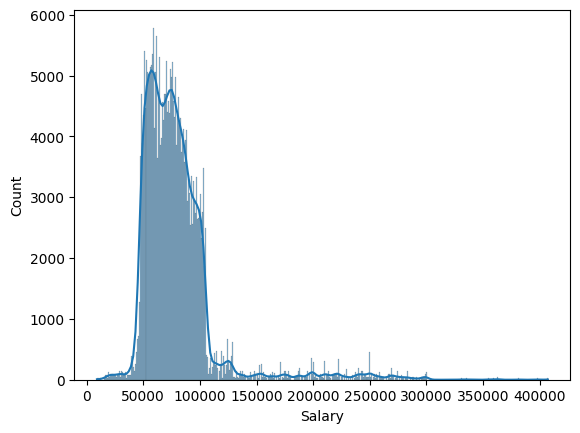

In [305]:
# Checking distribution of salary to decide what to do with Nulls.

sns.histplot(x='Salary', data=merged_df, kde=True);

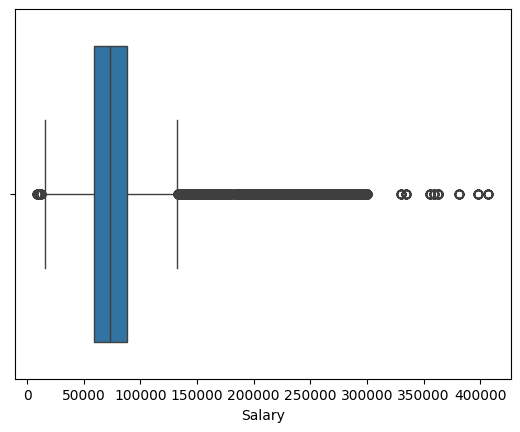

In [306]:
sns.boxplot(x='Salary', data=merged_df);

In [307]:
# Exploring nulls in detail.

df_salary_null = merged_df[merged_df['Salary'].isna()]

In [308]:
df_salary_null.describe(include='O').T

,count,unique,top,freq
Country,102260,1,Canada,102260
Province,102260,11,Ontario,33480
City,102260,29,Toronto,20224
Postal Code,102260,55,V6E 3D9,5734
Gender,102260,2,Male,51898
Education,102260,1,College,102260
Marital Status,102260,3,Single,58527
Loyalty Card,102260,3,Star,50863
Enrollment Type,102260,2,Standard,96541
Cancellation Year,102260,7,Active,89605


### Conclusion: where there are Null values in 'Salary' column, the customer did not want to share information. Furthermore, there is no available pattern to replace nulls in a simple way. There are 29 unique cities and 55 different postal codes. An option if we wanted to input the data could be to use KNN to use values of other columns where salary details are available to predict missing salary details. This method will take too long to execute and doest not fit the purpose of this exercise.

In [309]:
# Commenting this cell. KNN needs other columns to compare other variables and predict data to input. We will not
# be using this method due to the size of this data set and the time it takes to execute.

'''imputer_knn = KNNImputer(n_neighbors = 10)

imputer_knn_imputado = imputer_knn.fit_transform(merged_df_copy[["Salary"]])

imputer_knn_imputado'''

'imputer_knn = KNNImputer(n_neighbors = 10)\n\nimputer_knn_imputado = imputer_knn.fit_transform(merged_df_copy[["Salary"]])\n\nimputer_knn_imputado'

# Changing column data type where applicable

In [314]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [ ]:
# Function to change float type columns to integer where applicable.

def change_floats_to_int(dataframe, columns):
    for column in columns:
        if column in dataframe.columns and dataframe[column].dtype == 'float64':
            dataframe[column] = dataframe[column].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
    return dataframe

In [324]:
# Applying function to dataframe.

columns_to_convert = ['Points Accumulated', 'CLV']
change_floats_to_int(merged_df, columns_to_convert)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919,Standard,2016,8,Active,Active
1,100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887,Standard,2013,3,Active,Active
2,100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838,Standard,2016,7,Active,Active
3,100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170,Standard,2015,8,Active,Active
4,100272,2017,1,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622,Standard,2014,1,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290,Standard,2014,5,Active,Active
403756,999911,2018,12,0,0,0,0,0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564,Standard,2012,8,Active,Active
403757,999940,2018,12,3,0,3,1233,123,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266,Standard,2017,7,Active,Active
403758,999982,2018,12,0,0,0,0,0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631,Standard,2018,7,Active,Active


In [326]:
merged_df.to_csv("../Data/Customer_flight_activity.csv")

# Visualising data

### Number of flights per month for each year.

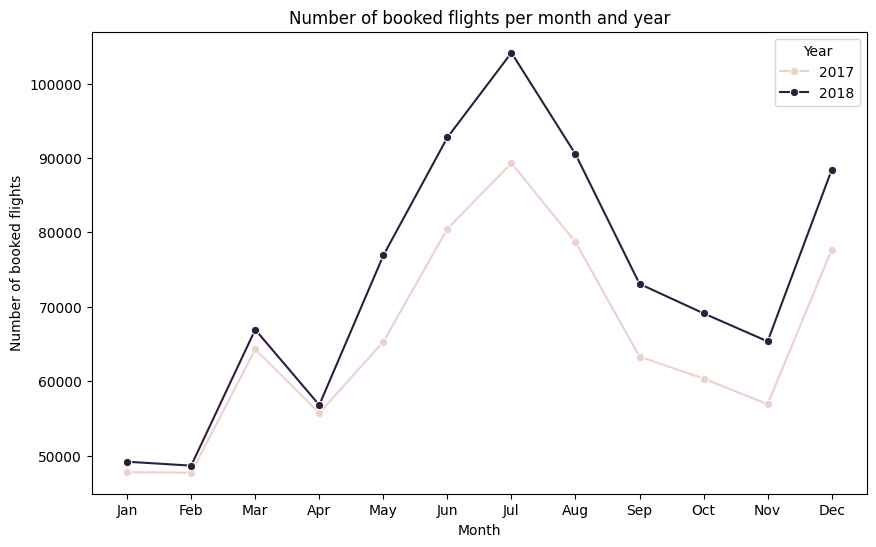

In [330]:
merged_df_grouped = merged_df.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=merged_df_grouped, x='Month', y='Flights Booked', hue='Year', marker='o')
plt.title('Number of booked flights per month and year')
plt.xlabel('Month')
plt.ylabel('Number of booked flights')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Is the flight distance related to the points per customer?

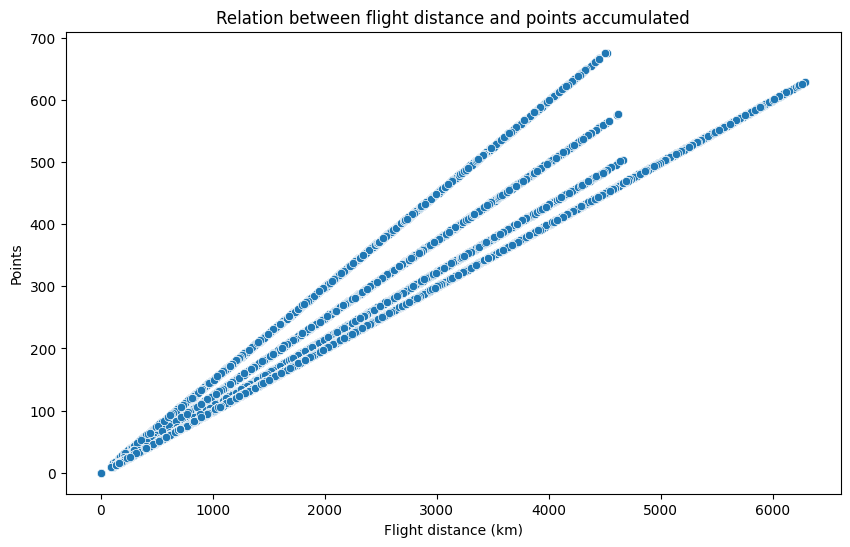

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Distance', y='Points Accumulated')
plt.title('Relation between flight distance and points accumulated')
plt.xlabel('Flight distance (km)')
plt.ylabel('Points')
plt.show()

# We can see a positive correlation between flight distance and points. Points go up as flight distance increases.

### Number of customers per province.

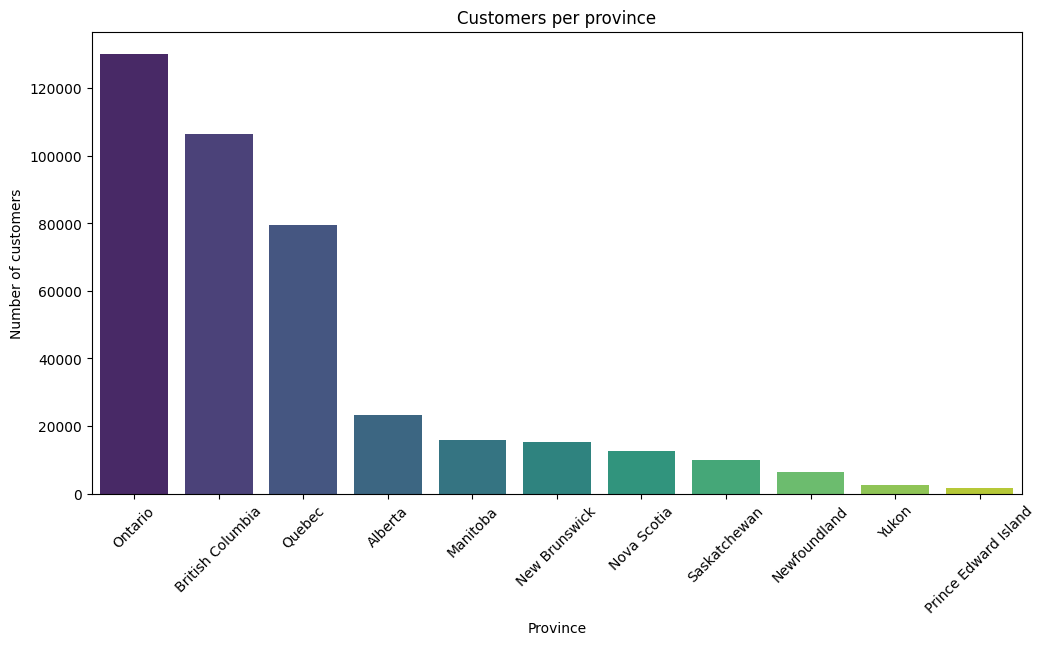

In [ ]:
province_counts = merged_df['Province'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=province_counts.index, y=province_counts.values, palette='viridis')
plt.title('Customers per province')
plt.xlabel('Province')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

# Most customers are in Ontario, Brittish Columbia and Quebec ranging from approx. 78,000 to 135,000 customers. 
# The provinces with less customers are Newfoundland, Yukon and Prince Edward Island with less than around 10,000 customers.

### How does the average salary compare across the different educational levels of the customers?

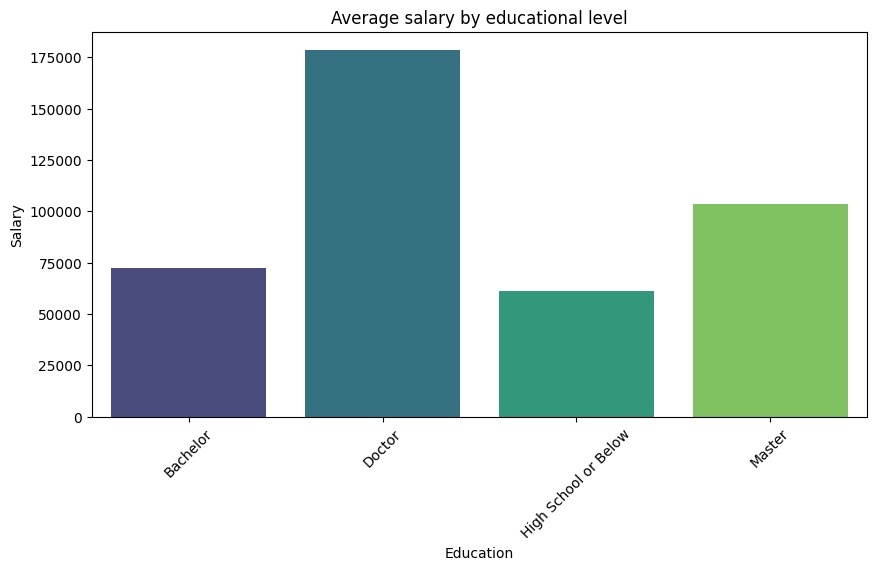

In [347]:
education_filter = merged_df.loc[merged_df['Education'] != 'College'].reset_index() # Customers with Education 'College' have no salary details.

average_salary_education = education_filter.groupby('Education')['Salary'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data = average_salary_education, x='Education', y='Salary', palette='viridis')
plt.title('Average salary by educational level')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

# Average salary increases with educational level. The higher the degree, the higher the salary. 

### What is the proportion of customers with different types of loyalty cards?

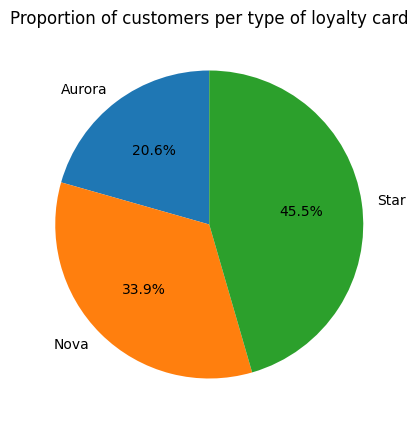

In [ ]:
# Converting column 'Loyalty Number' to numeric. Cells with no numeric value will be converted to Nan. 
merged_df['Loyalty Number'] = pd.to_numeric(merged_df['Loyalty Number'], errors='coerce')

# Number of customers per type of Fidelity Card.
count_loyalty_number = merged_df.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()

# Total number of customers.
total_customers = len(merged_df)

# Proportions in %.
loyalty_proportion = (count_loyalty_number['Loyalty Number'] / total_customers) * 100

# Pie chart.
plt.figure(figsize=(5, 5))
plt.pie(loyalty_proportion, labels=count_loyalty_number['Loyalty Card'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of customers per type of loyalty card')
plt.show()

### How are customers distributed according to their marital status and gender?

In [390]:
merged_df_grouped1 = merged_df.groupby(['Marital Status', 'Gender'])['Loyalty Number'].count().reset_index()
pivot_df = merged_df_grouped1.pivot(index='Marital Status', columns='Gender', values='Loyalty Number').fillna(0)

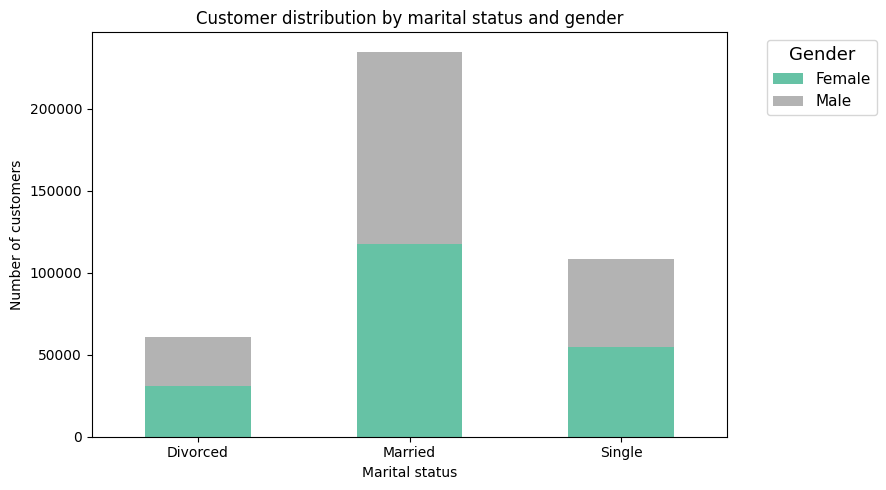

In [394]:
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(9, 5), colormap='Set2')

# Añadir título y etiquetas
plt.title('Customer distribution by marital status and gender')
plt.xlabel('Marital status')
plt.ylabel('Number of customers')
plt.xticks(rotation=0)  # Para que las etiquetas de las categorías estén horizontales
plt.legend(title='Gender', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 

# Evaluation of Differences in Flight Bookings by Educational Level

 . Preparación de Datos: Filtra el conjunto de d
atos para incluir única
'Flights Booked' y 'Education'.
mente las columnas relevantes:
 . Análisis Descriptivo: Agrupa los d
atos por nivel educativo y calcula esta
d
ísticas descriptivas
básicas (como el promedio, la
desviación estand
ar) del número de vuelos reserva
dos para ca
grupo.
a
d
 . Prueba
Esta
d
ística: Realiza una prueba
significativa en el número de vuelos reserva
de hipótesis para
determinar si existe una
dos entre los diferentes niveles educativos.
diferenc

In [409]:
merg_df_flights_education = merged_df[['Flights Booked', 'Education']]
merg_df_flights_education.groupby('Education')['Flights Booked'].describe().T

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


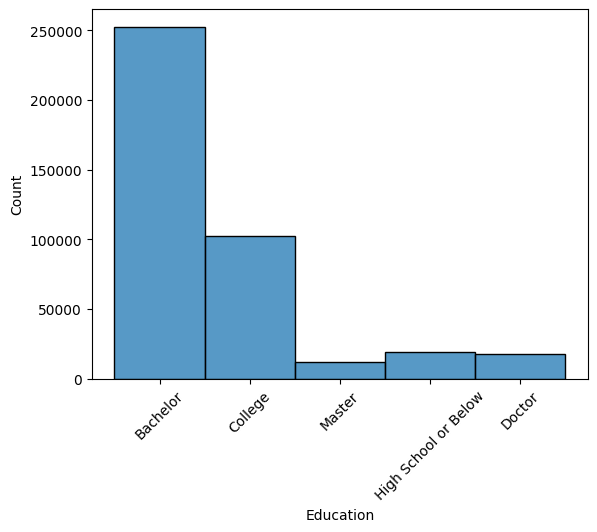

In [416]:
sns.histplot(x='Education', data=merg_df_flights_education)
plt.xticks(rotation=45);

In [417]:
def normal_distribution(dataframe, column):

    statistic, p_value = stats.shapiro(dataframe[column])
    if p_value > 0.05:
        print(f"For {column} the data follows a normal distribution")
    else:
        print(f"For {column} the data does not follow a normal distribution")

In [418]:
normal_distribution(merg_df_flights_education, 'Flights Booked')

For Flights Booked the data does not follow a normal distribution


In [420]:
def homogeneity(dataframe, column, metric_column):
 
    values_evaluate = []
    
    for value in dataframe[column].unique():
        values_evaluate.append(dataframe[dataframe[column]== value][metric_column])

    statistic, p_value = stats.levene(values_evaluate)
    if p_value > 0.05:
        print(f"Para la métrica {metric_column} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {metric_column}, las varianzas no son homogéneas entre grupos.")


In [421]:
homogeneity(merg_df_flights_education, 'Education', 'Flights Booked')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.